**PCA Handson**



*   Dimensionality Reduction Techique
*   Unsupervised Learning Technique


*   Used To cure the curse of dimensionality: Overfitting of model

*   Reducing the higher dimensions into lower dimensions retaining most of the information in the new dimensions
*   










*   Step 1: Standardisation of data

*   Step2: Covariance Matrix:It is the linear relationship between two variables(direction)

*   Step 3:Eigen values and Eigen Vectors



*   


*   Correlation:relationship between two variables(magnitude+ direction)

*   PCs
*   Scree plot

*   Model Building
*   List item









*   Eigen Value:Explained Variance by each pricipal componenet(magnitude)
*   Eigen Vector:The Principle axis of the data(the direction of explained variance



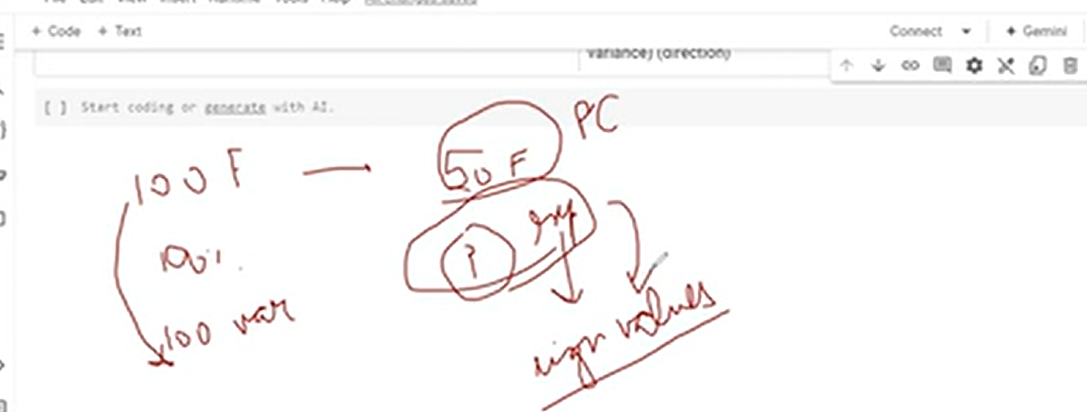

In [ ]:
#they tell us how much information is maintained by new PCs :eigen value.

In [ ]:
#scree plot is a plot that gives the optimal number of PCs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the inbuilt dataset from sklearn

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
#data as well as digits

In [ ]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.shape

(1797, 64)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
pixel_0_0,0
pixel_0_1,0
pixel_0_2,0
pixel_0_3,0
pixel_0_4,0
pixel_0_5,0
pixel_0_6,0
pixel_0_7,0
pixel_1_0,0
pixel_1_1,0


In [ ]:
#there would no null and duplicates because it is an inbuilt data

Creating target column for use later in model building

In [ ]:
y=pd.DataFrame(digits.target)

In [ ]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


**Standardisation of data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()        #we need to create the object of the class and then we can fetch the properties of the class

In [ ]:
df_std=sc.fit_transform(df)

In [ ]:
df_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
#converting it into DataFrame

In [ ]:
df_std=pd.DataFrame(df_std)
df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008




*   **Transpose Df**
*   

*  Converting rows to clumns and vice vers
*  since function of covariance converts covariance on rows data thus we will convert cols to rows  so that cov is calculated for the features .






In [ ]:
df_std_T=df_std.T

In [ ]:
df_std_T

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


**Covariance_Matrix**

In [ ]:
cov_mat=np.cov(df_std_T)

In [ ]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [ ]:
cov_mat.shape #we are calculating the cov_matrix for 64 rows so we get 64 *64

(64, 64)

In [ ]:
np.min(cov_mat)

-0.57051363323811

**bold text**

*  Calculating eigen values and eigen vectors




In [ ]:
eigen_value,eigen_vector=np.linalg.eig(cov_mat)

In [ ]:
eigen_value  # first principle componnet will give the highest explained variance after that it keeps on decreasing

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [ ]:
#sum of eigen values will be 100

In [ ]:
len(eigen_value)

64

In [ ]:
eigen_vector

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
total=sum(eigen_value)

In [ ]:
total

61.03396436525629

**Percentage explained by each variance**

In [ ]:
exp_var=[(i/total)*100 for i in eigen_value]

In [ ]:
exp_var

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.08253509448180278,
 0.48180758644514254,
 0.45371925985845096,
 0.10369573015571817,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.12510074249730116,
 0.13511841133708546,
 0.14776269410608744,
 0.1612360622567



* Cumlative Variance




In [ ]:
np.max(exp_var)

12.033916097734904

In [ ]:
cum_exp_var=np.cumsum(exp_var)

In [ ]:
cum_exp_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  93.80175675,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

In [ ]:
np.max(cum_exp_var

100.00000000000004

**Scree Plot**




*   Combination of Bar plot + step plot
*   bar plot:exp_var(individual)

*   step_plot:cum_exp_var(cum_sum)
*   x-axis :number ofPCs

*   y-axis=the variance
*  







In [ ]:
range(len(exp_var))

range(0, 64)

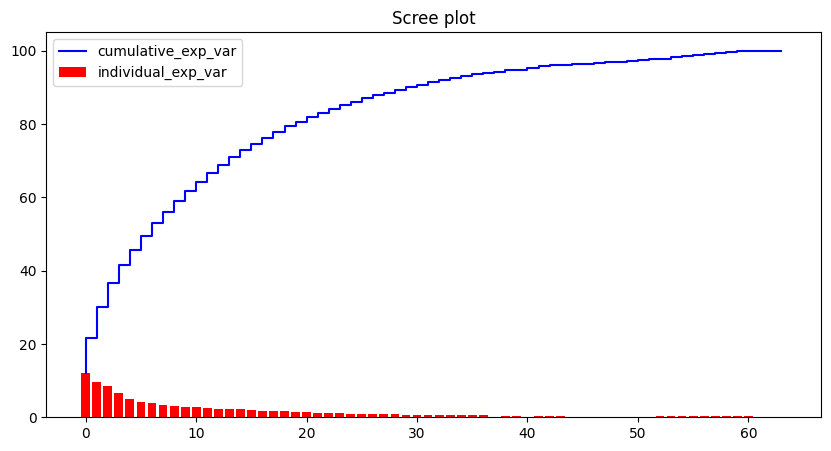

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(len(exp_var)),exp_var,label="individual_exp_var",color="red")
plt.step(range(len(cum_exp_var)),cum_exp_var,label="cumulative_exp_var",color="blue")
plt.title("Scree plot")
plt.legend()
plt.show()

In [ ]:
#first PC1 is having the best variance or best combination of features




*   From the above graph we need to choose the optimal number of PCs as the value on x axis where the step plot is becoming constant
*   List item



In [ ]:
#for this case it is 40 PCs as optimal number of Pcs

In [ ]:
#cumulative is sum so it will definitely going to increase

Once we choose reduced dimensions thats the ned of PCA
We can implement model building afterwards with the new features

**Model Building**

**Storing new features from PCA**

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=40)
x_pca=pca.fit_transform(df_std)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
max_explained_variance_ratio = np.max(explained_variance_ratio)

In [ ]:
print(max_explained_variance_ratio)

0.12033916097734901


In [ ]:
x_pca.shape

(1797, 40)

In [ ]:
pca=PCA(0.95)
x_pca=pca.fit_transform(df_std)             #There are two ways of representing PCA

In [ ]:
x_pca.shape

(1797, 40)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.30,random_state=0)

In [ ]:
X_train.shape
X_test.shape

(540, 40)

In [ ]:
y_train.shape

(1257, 1)

In [ ]:
y_test.shape

(540, 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics  import accuracy_score
accuracy_score(y_test,y_pred)

0.9629629629629629

**the End**

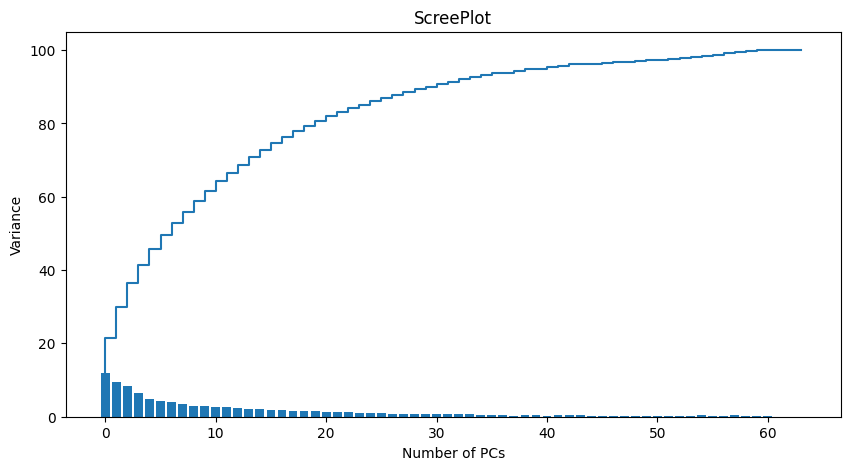

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(len(exp_var)),exp_var,label="individualexplainedvar")
plt.step(range(len(cum_exp_var)),cum_exp_var,label="cumulativeexplainedvar")
plt.title("ScreePlot")
plt.xlabel('Number of PCs')
plt.ylabel("Variance")
plt.show()